In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [2]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
train = ImageDataGenerator(rescale = 1.0/255)
validation = ImageDataGenerator(rescale = 1.0/255)

In [4]:
train_dataset = train.flow_from_directory("C:/Users/lamim/Desktop/N_Thesis/split_dataset3/train",
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')
validation_dataset = validation.flow_from_directory("C:/Users/lamim/Desktop/N_Thesis/split_dataset3 - Copy/val",
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')

Found 8790 images belonging to 2 classes.
Found 1120 images belonging to 2 classes.


In [5]:
train_dataset.class_indices

{'BMR': 0, 'RASH': 1}

In [6]:
validation_dataset.class_indices

{'BMR': 0, 'RASH': 1}

In [7]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
validation_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import Xception
from tensorflow.keras.regularizers import l2
# Load the Xception model with pretrained weights
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Freeze the base model layers
base_model.trainable = False

# Build the updated model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),  
   Dense(2, activation='softmax', kernel_regularizer=l2(0.01))  
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Initial learning rate
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(
    train_dataset,  
    validation_data=validation_dataset,
    epochs=10,
    callbacks=[lr_scheduler]
)


C:\Users\lamim\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.6448 - loss: 0.6664 - precision: 0.6448 - recall: 0.6448 - val_accuracy: 0.7787 - val_loss: 0.5399 - val_precision: 0.7787 - val_recall: 0.7787 - learning_rate: 0.0010
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - accuracy: 0.7710 - loss: 0.5290 - precision: 0.7710 - recall: 0.7710 - val_accuracy: 0.8000 - val_loss: 0.5120 - val_precision: 0.8000 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - accuracy: 0.7990 - loss: 0.4918 - precision: 0.7990 - recall: 0.7990 - val_accuracy: 0.8380 - val_loss: 0.4922 - val_precision: 0.8380 - val_recall: 0.8380 - learning_rate: 0.0010
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 397s 1s/step - accuracy: 0.8057 - loss: 0.4906 - precision: 0.8057 - recall: 0.8057 - val_accuracy: 0.8185 - val_loss: 0.5116 - val_precision: 0.8185 - val_recall: 0.8185 - learning_rate: 0.0010
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accurac

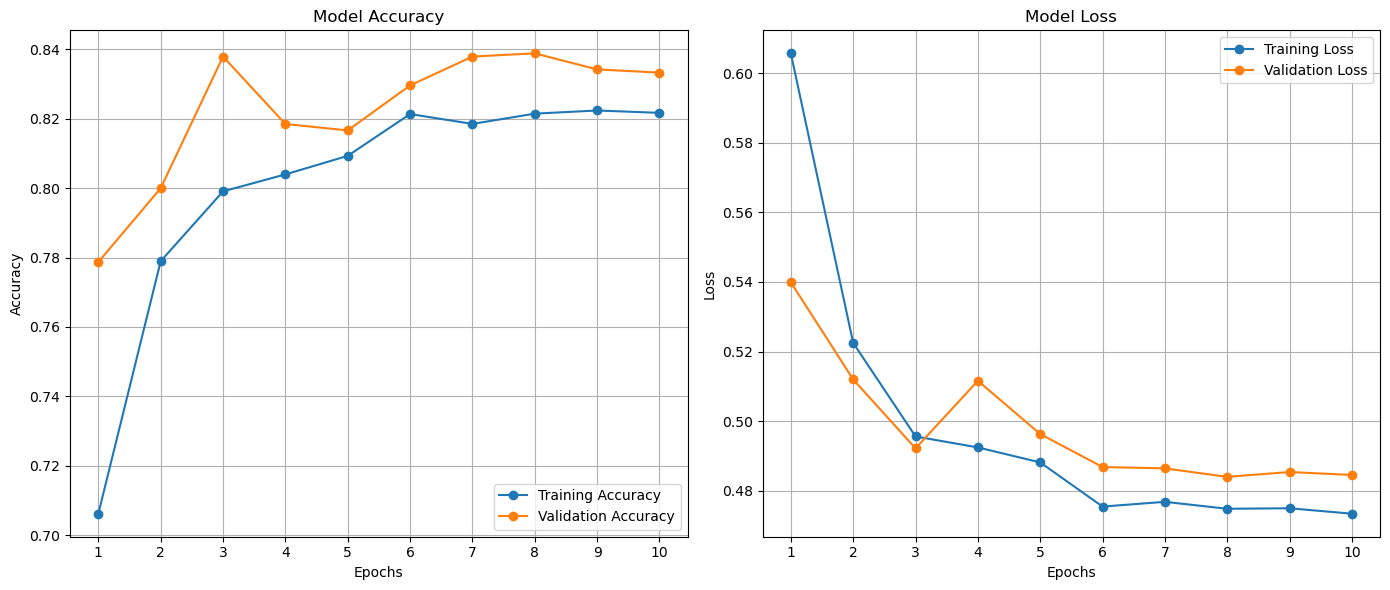

Plot saved to: C:\Users\lamim\Desktop\N_Thesis\BMR_CNN\RESULT_VGG_16\training_plot.png


In [11]:
import matplotlib.pyplot as plt
import os
import csv

# Extracting history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

output_dir = "my_results"
os.makedirs(output_dir, exist_ok=True)

csv_path = os.path.join(output_dir, "training_log.csv")
with open(csv_path, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Epoch", "Train Accuracy", "Val Accuracy", "Train Loss", "Val Loss"])
    for epoch in epochs:
        writer.writerow([
            epoch,
            train_accuracy[epoch-1],
            val_accuracy[epoch-1],
            train_loss[epoch-1],
            val_loss[epoch-1]
        ])

# Plot
plt.figure(figsize=(14, 6))

# Subplot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.grid()

# Subplot for Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.grid()

plt.tight_layout()

output_dir = r"C:\Users\lamim\Desktop\N_Thesis\BMR_CNN\RESULT_VGG_16"
os.makedirs(output_dir, exist_ok=True)

fig_path = os.path.join(output_dir, "training_plot.png")
plt.savefig(fig_path, dpi=300)
plt.show()

print(f"Plot saved to: {fig_path}")


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize test images

test_dataset = test_datagen.flow_from_directory(
    "C:/Users/lamim/Desktop/N_Thesis/split_dataset3/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 1130 images belonging to 2 classes.


In [13]:
import tensorflow as tf
import numpy as np

# Print Model Summary
model.summary()

# Count Trainable and Non-Trainable Parameters
trainable_params = np.sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
non_trainable_params = np.sum([tf.keras.backend.count_params(w) for w in model.non_trainable_weights])

# Print Details
print("\n================ MODEL DETAILS ================")
print(f"Total Parameters: {trainable_params + non_trainable_params}")
print(f"Trainable Parameters: {trainable_params}")
print(f"Non-Trainable Parameters: {non_trainable_params}")
print(f"Number of Layers: {len(model.layers)}")
print("\n===============================================")

# Print Layer-wise Trainable Status
print("\nLayer-wise Trainability:")
for layer in model.layers:
    print(f"{layer.name}: Trainable = {layer.trainable}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,873,776 (79.63 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 8,198 (32.03 KB)


================ MODEL DETAILS ================
Total Parameters: 20865578
Trainable Parameters: 4098
Non-Trainable Parameters: 20861480
Number of Layers: 4


Layer-wise Trainability:
xception: Trainable = False
global_average_pooling2d: Trainable = True
dropout: Trainable = True
dense: Trainable = True


In [15]:
# Evaluate model on test dataset
test_results = model.evaluate(test_dataset)

# Extract values
test_loss = test_results[0]   # Test loss
test_acc = test_results[1]    # Test accuracy
test_precision = test_results[2]  # Test precision
test_recall = test_results[3]     # Test recall

# Print results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 31s 832ms/step - accuracy: 0.7746 - loss: 0.5358 - precision: 0.7746 - recall: 0.7746
Test Loss: 0.5315
Test Accuracy: 0.7733
Test Precision: 0.7733
Test Recall: 0.7733
